# 1. Introdução

A Amazon Web Services (AWS) é a plataforma de nuvem mais adotada e mais abrangente do mundo, oferecendo mais de 200 serviços completos de datacenters em todo o mundo. Milhões de clientes, incluindo as startups de crescimento mais rápido, grandes empresas e os maiores órgãos governamentais, estão usando a AWS para reduzirem seus custos, ficarem mais ágeis e inovarem mais rapidamente.

O ambiente AWS permite o processamento e análise de dados direto na nuvem, que implica principalmente em uma redução significativa de tempo de processamento e reduação de espaço fisícos para armazenamento de dados.

Este script tem como objetivo uma análise preditiva relacionada a preços de casas nos E.U.A utilizada algoritmos de regressão.

# 2. Carga dos Dados

### 2.1 Instalação dos Pacotes

In [27]:
#%conda update -n base conda
#%conda install numpy
#%conda install pandas
#%conda install seaborn
#%conda install matplotlib
#%conda install scikit-learn
#%conda install sagemaker
#%conda install aws-c-io

### 2.2 Pacotes carregados no script

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

%matplotlib inline

### 2.3 Carga do arquivo csv

In [3]:
base_casas = pd.read_csv('house_prices.csv')
base_casas

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
# Colunas da base de dados
base_casas.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
# Resumo Estatístico da base de dados
base_casas.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
# Verifica se há valores nulos na base
base_casas.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# 3. Visualização dos Dados

In [7]:
# Correlação dos dados
base_casas.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


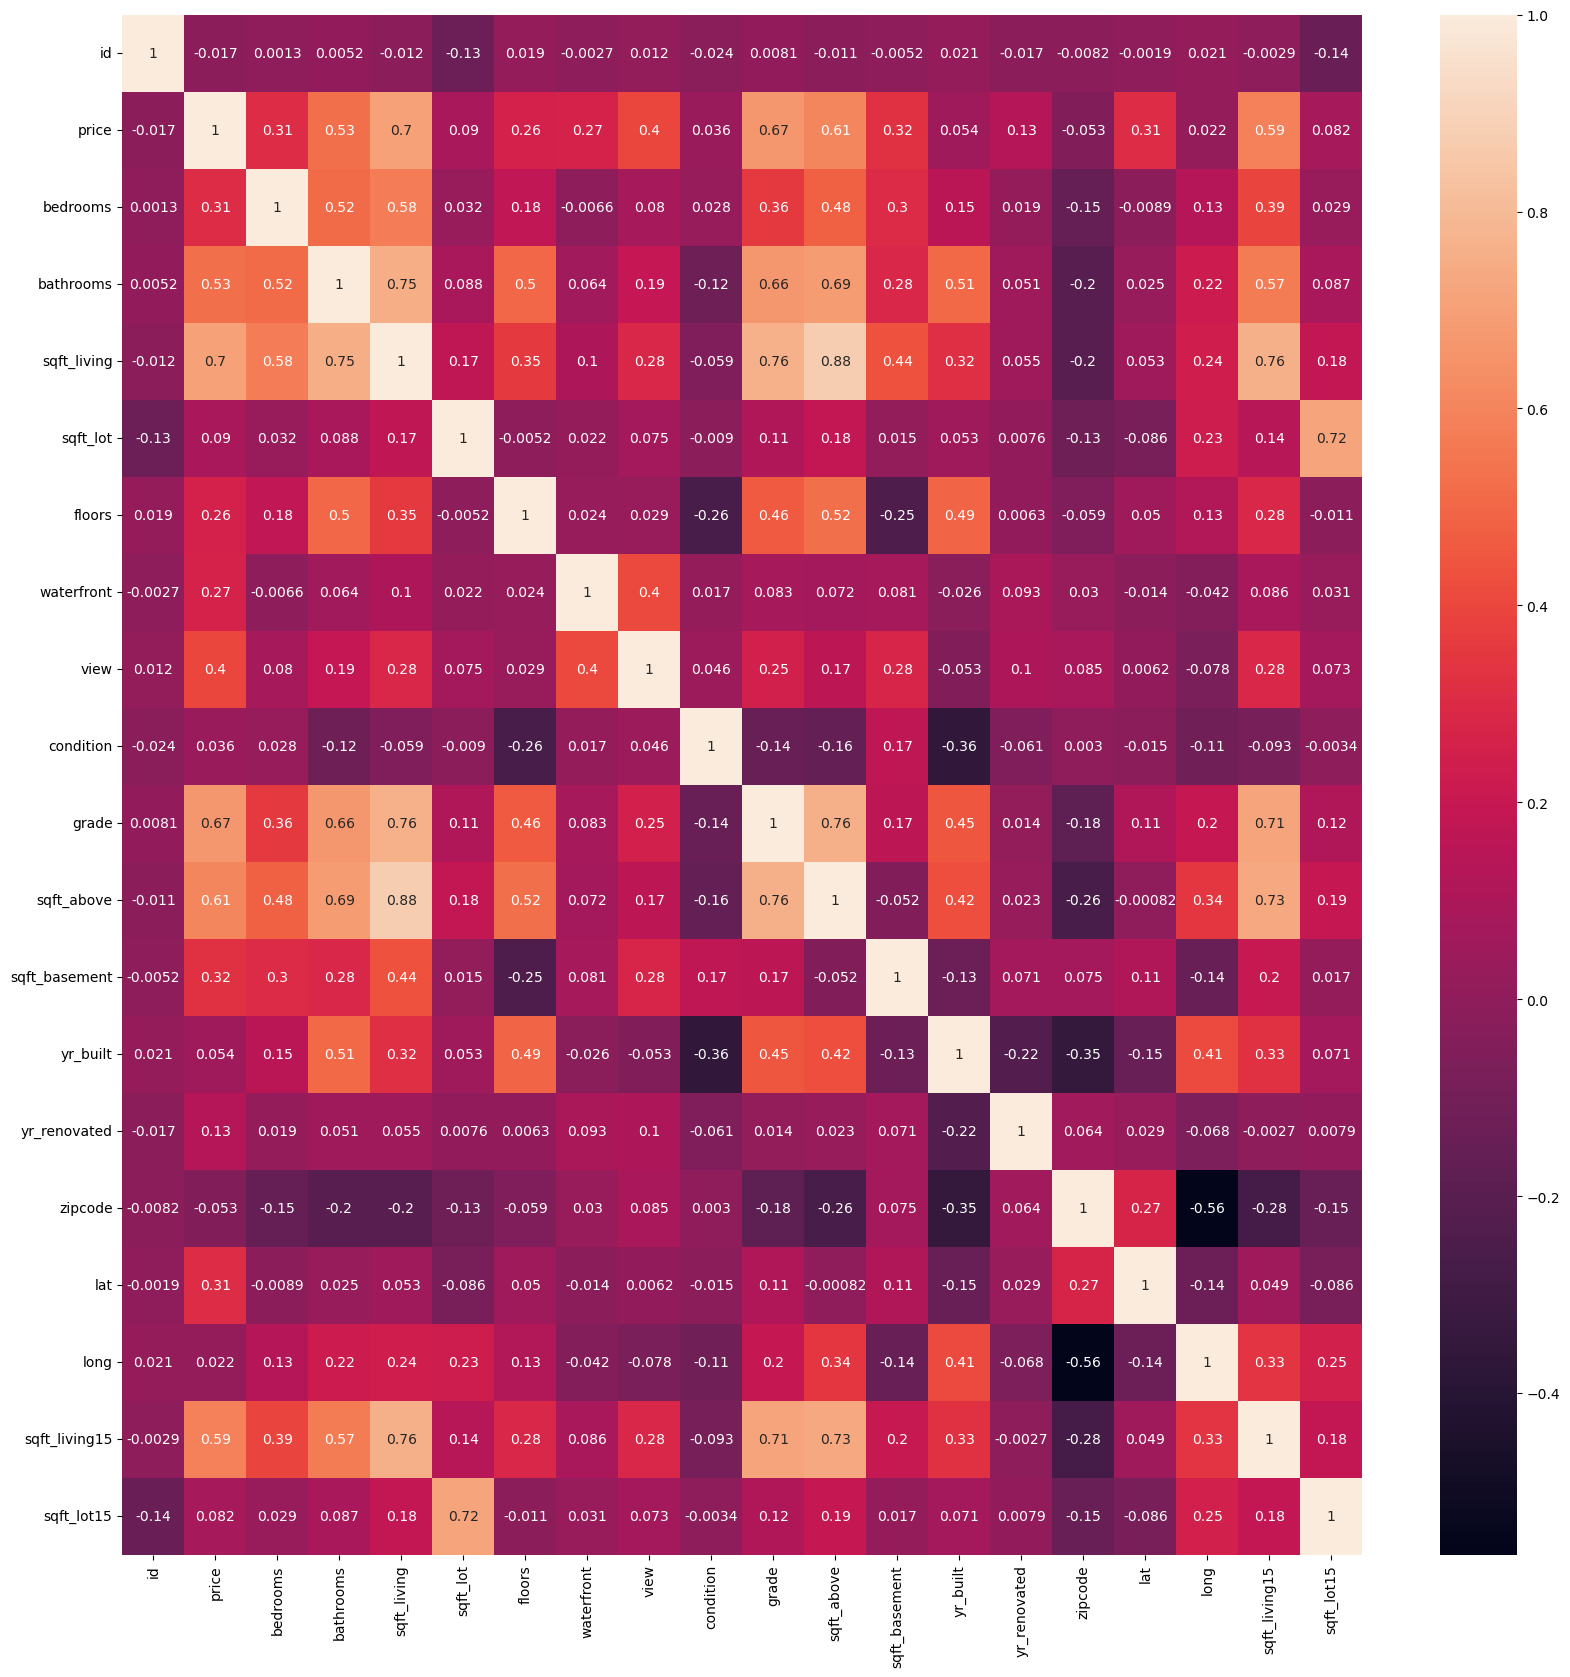

In [8]:
figura = plt.figure(figsize = (20 , 20))
sns.heatmap(base_casas.corr(), annot = True);

# 4. Pré-Processamento dos Dados

In [9]:
#Seleção das variáveis previsoras
x = base_casas.iloc[: ,3:19].values
x

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03, ...,  9.81780e+04,
         4.75112e+01, -1.22257e+02],
       [ 3.00000e+00,  2.25000e+00,  2.57000e+03, ...,  9.81250e+04,
         4.77210e+01, -1.22319e+02],
       [ 2.00000e+00,  1.00000e+00,  7.70000e+02, ...,  9.80280e+04,
         4.77379e+01, -1.22233e+02],
       ...,
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ...,  9.81440e+04,
         4.75944e+01, -1.22299e+02],
       [ 3.00000e+00,  2.50000e+00,  1.60000e+03, ...,  9.80270e+04,
         4.75345e+01, -1.22069e+02],
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ...,  9.81440e+04,
         4.75941e+01, -1.22299e+02]])

In [10]:
# Confirma shape de x
x.shape

(21613, 16)

In [11]:
# Seleção da varíavel preditora
y = base_casas.iloc[: , 2].values
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [12]:
# Confirma shape de y
y.shape

(21613,)

AWS apenas recebe dados em matriz (x) e vetor (y), por isso é necessáro realizar essas transformações com numpy.
Dessa forma, vamos converter os dados para array numpy com dados tipo float32

In [13]:
# Conversão de x e y
x = np.array(x).astype('float32')
y = np.array(y).astype('float32')

In [14]:
# Divisão de treino e teste
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [15]:
# Verifica shape dos dados em x
x_treinamento.shape, x_teste.shape

((15129, 16), (6484, 16))

In [16]:
# Verifica shape dos dados em y
y_treinamento.shape, y_teste.shape

((15129,), (6484,))

Vale Lembrar que o próprio AWS possui a habilidade de normalizar os dados automaticamente e por isso não será usado uma função para esta técnica.

# 5. Configuração AWS SageMaker

Como esse é o ambiente SageMaker Studio Lab, uma plataforma gratuita do AWS para prática de Machine Learning, essa etapa de configuração do SageMaker não é necessária.

Contudo para fins de prática do conhecimento e bem como documentação de como habilitar o SageMaker em conjunto com o S3 (armazenamento dos buckets AWS), será registrado o script nesta seção com comentários que explicaram os motivos de cada linha e código.

In [31]:
# Carga para iniciar o SageMaker

import sagemaker
import boto3 
from sagemaker import Session

In [ ]:
# Cria sessões e bem como caminhos de pasta para armazenamento dos datasets do modelo
session = sagemaker.Session()
bucket = 'cursoawssagemaker' # Envia o dataset binário para o bucket do S3
subpasta_modelo = 'modelos/house-prices/linear-learner' # Pasta para armazenar o modelo do SageMaker
subpasta_dataset = 'datasets/house-prices' # Pasta para armazenar a base de dados

In [ ]:
# Identifica as permissões do SageMaker que foi feita quando criado o usuário
role = sagemaker.get_execution_role()
print(role)

In [ ]:
# Conversõa dos dados para formato binário
import io
import sagemaker.amazon.common as smac # biblioteca do sagemaker common library

buffer = io.BytesIO() #Cria a base de dados no formato de bytes

# Função para converter do Numpy para Dense Tensor que é utilizado no AWS
smac.write_numpy_to_dense_tensor(buffer, 
                                 x_treinamento, 
                                 y_treinamento)

buffer.seek(0) # Coloca a base na posição inicial da base porque o buffer incremente em 1

In [ ]:
# Upload dos dados para o S3
import os # Biblioteca do sistema operacional
key = 'houses-train-data' # base de dados de treinamento
boto3.resource('s3').Bucker(bucket).Object(os.path.join(subpasta_dataset, 'train', key)).upload_fileobj(buffer)

In [ ]:
# Pasta para a base de trainamento do modelo
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, subpasta_dataset, key)
print('Localização base de treinamento: {}'.format(s3_train_data)

In [ ]:
# Pasta para o modelo já criado
output_location = 's3://{}/{}/output'.format(bucket, subpasta_modelo)
print('O modelo será salvo em: {}'.format(output_location))

# 6. Modelo com Linear Learner

Para mais informações sobre o Linear Learner, basta acessar: https://docs.aws.amazon.com/sagemaker/latest/dg/linear-learner.html

Esta seção está registrada como Us-East2 e os algoritmos disponíveis nesta seção são: https://docs.aws.amazon.com/sagemaker/latest/dg/ecr-us-east-2.html

As duas próximas linhas de códigos são referentes ao uso do SageMaker no ambiente AWS com S3.

In [29]:
# Criar container do AWS que importa o Linear Learner
container = sagemaker.image_uris.retrieve(framework = 'linear-learner', region = 'us-east-2')

In [ ]:
# Criar configurações para o Linear Learner
linear = sagemaker.estimator.Estimator(image_uri = container, # importa o algoritmo
                                       instance_count = 1 , # número de instâncias EC2
                                       instance_type = 'ml.m4.xlarge', # tipo de instância EC2
                                       output_path = output_location, # onde o modelo será salvo
                                       sagemaker_session = session, #sessão do sagemaker
                                       use_stop_instances = True) # AWS usa instâncias ociosas, só funciona na versão paga

In [ ]:
# Configuração dos hiperparametros
linear.set_hyperparameters(feature_dim = 16, # Parametro obrigatorio para indicar o número de colunas na base de dados
                           predictor_type = 'regressor', # Tipo de algoritmo, neste caso Regressão
                           num_models = 16) # Quantidade de modelos que serão gerados no treinamento. SageMaker seleciona o melhor.

In [ ]:
linear.fit({'train': s3_train_data}) # fit do modelo com indicação do bucket no S3

# 7. Avaliação do Modelo

In [ ]:
# https://aws.amazon.com/pt/ec2/instance-types/inf1/
# Cria o modelo com Linear Learner

linear_regressor = linear.deploy(initial_instance_count = 1, # Número de instâncias do modelo
                                 instance_type = 'ml.m4.xlarge') # Tipo de instância do EC2, mesma usada antes

In [ ]:
# Carga de pacotes para avaliação do modelo

from sagemaker.serializers import CSVSerializer #Formato de dados que o modelo recebe como parâmetro
from sagemaker.deserializers import JSONDeserializer #Formato de saída do modelo

In [ ]:
# Converte os dados de entrada e saída do modelo

linear_regressor.serializer = CSVSerializer()
linear_regressor.deserializer = JSONDeserializer()

In [ ]:
# Previsões do modelo com os dados de teste do modelo
# Com o comando anterior, os dados de entrada vão no formato CSV
# Com o comando anterior, os dados de saída vem no formato JSON

results = linear_regressor.predict(X_teste)
results

In [ ]:
# Converte as previsões do modelo no formato JSON em Numpy Array
previsoes = np.array([r['score'] for r in results['predictions']])
previsoes

In [ ]:
# Avaliação do modelo com MAE e MSE

from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_teste, previsoes)
mse = mean_squared_error(y_teste, previsoes)
print('MAE = ', mae, '\nMSE = ', mse)

In [ ]:
# Fecha a conexão do modelo com o S3. Importante para não gerar cobranças adicionais.
linear_regressor.delete_endpoint()

# 8. Links úteis

In [ ]:
# https://docs.aws.amazon.com/sagemaker/latest/dg/linear-learner.html
# https://docs.aws.amazon.com/sagemaker/latest/dg/ecr-sa-east-1.html
# https://aws.amazon.com/ec2/instance-types/
# https://docs.aws.amazon.com/pt_br/AWSEC2/latest/UserGuide/instance-types.html
# https://docs.aws.amazon.com/sagemaker/latest/dg/notebooks-available-instance-types.html
# https://sagemaker.readthedocs.io/en/stable/api/training/estimators.html
# https://aws.amazon.com/pt/about-aws/whats-new/2019/08/amazon-sagemaker-launches-managed-spot-training-saving-machine-learning-training-costs/
# https://docs.aws.amazon.com/sagemaker/latest/dg/ll_hyperparameters.html
# https://aws.amazon.com/pt/ec2/instance-types/inf1/